In [1]:
# Import the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data file using pandas. 

In [2]:
data=pd.read_csv('1569582940_googleplaystore.zip',engine='python')

In [3]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Check for null values in the data. Get the number of null values for each column.

In [4]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Drop records with nulls in any of the columns.

In [135]:
data.dropna(inplace=True)
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# Variables seem to have incorrect type and inconsistent formatting, We need to fix them: 

In [137]:
#Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
# function
def func(Size):
    if 'M' in Size:
        x=Size[:-1]
        x=float(x)*1000
        return x
    elif 'k' in Size:
        x=Size[:-1]
        x=float(x)
        return x
    else:
        return None

In [140]:
data['Size']=data['Size'].map(func)

TypeError: argument of type 'float' is not iterable

In [141]:
#Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [142]:
data['Reviews']=data['Reviews'].astype('int')


In [143]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [713]:
#Installs field is currently stored as string and has values like 1,000,000+. 

#remove ‘+’, ‘,’ from the field, convert it to integer
data['Installs']=data['Installs'].str.replace('[+,]',"")



AttributeError: Can only use .str accessor with string values!

In [145]:
data['Installs']=data['Installs'].astype('int')


In [146]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [655]:
#Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.
data['Price']=data['Price'].str.replace('[$]','',regex=True)

AttributeError: Can only use .str accessor with string values!

In [148]:
data['Price']=data['Price'].astype('float')

In [149]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [150]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Sanity checks:

In [151]:
# 1. Average rating should be between 1 and 5 as only these values are allowed on the play store.
#Drop the rows that have a value outside this range.
data.drop(data[data['Rating'] > 5].index, inplace = True)

In [152]:
data.drop(data[data['Rating'] <1].index, inplace = True)

In [153]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619.0,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [154]:
# 2. Reviews should not be more than installs as only those who installed can review the app.
#If there are any such records, drop them.
data.loc[data['Reviews']>data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [155]:
temp = data[data['Reviews']>data['Installs']].index
data.drop(labels=temp, inplace=True)

In [156]:
data.loc[data['Reviews']>data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [157]:
#For free apps (type = “Free”), the price should not be >0. Drop any such rows.
data['Type'].value_counts()

Free    6915
Paid     560
Name: Type, dtype: int64

In [158]:
data['Price'].value_counts()

0.00     6915
0.99      104
2.99      101
4.99       63
1.99       53
         ... 
6.49        1
1.29        1
37.99       1
18.99       1
1.20        1
Name: Price, Length: 63, dtype: int64

from above observation value count of 0 and Free is same so condition is satisfied. 

 # univariate analysis: 

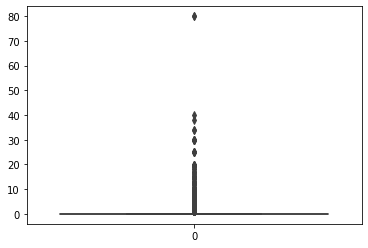

In [159]:
#Boxplot for Price
sns.boxplot(data=data.Price)
plt.show()


#Are there any outliers? Think about the price of usual apps on Play Store.

Ans: yes there are outliers as the price of apps is usualy 0 so that we can see outliers 

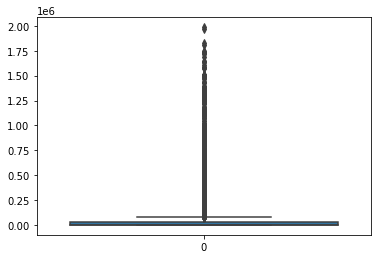

In [160]:
#Boxplot for Reviews
sns.boxplot(data=data.Reviews)
plt.show()

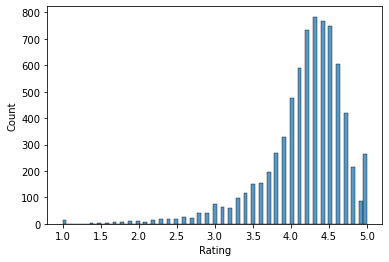

In [161]:
#Histogram for Rating

sns.histplot(data=data.Rating)
plt.show()


#How are the ratings distributed? Is it more toward higher ratings?

Ans: as we can see from above histogram data is left skewed and it is distributed towards
    higher rating i.e from 3 to 5

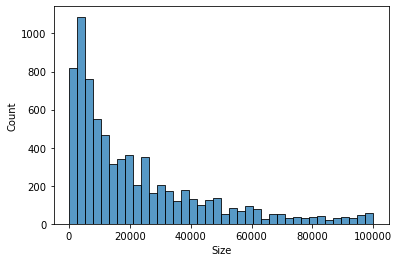

In [162]:
# Histogram for Size
sns.histplot(data=data.Size)
plt.show()

 # Outlier treatment: 

In [163]:
# 1. Price: 
#From the box plot, it seems like there are some apps with very high price. 
# A price of $200 for an application on the Play Store is very high and suspicious!

# Check out the records with very high price
(data['Price']>200).value_counts()

False    7475
Name: Price, dtype: int64

From above observation there are 15 records which has app-price greater than 200 as it 
seem to be junk apps . let's drop them. 

In [164]:
data.drop(data[data['Price'] > 200].index, inplace = True)

In [165]:
(data['Price']>200).value_counts()

False    7475
Name: Price, dtype: int64

In [166]:
 # 2. Reviews: 
    #Very few apps have very high number of reviews. 
    #These are all star apps that don’t help with the analysis and, in fact, will skew it. 
    #Drop records having more than 2 million reviews.



In [167]:
(data[data['Reviews'] > 2000000].index).value_counts().sum()

0

In [168]:
data.drop(data[data['Reviews'] > 2000000].index,inplace = True)

In [335]:
#Installs:
# 1. Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

data.Installs.quantile([0.1,0.25,0.50,0.70,0.90,0.95,0.99])

0.10        1000.0
0.25       10000.0
0.50      100000.0
0.70     1000000.0
0.90    10000000.0
0.95    10000000.0
0.99    10000000.0
Name: Installs, dtype: float64

In [336]:
# 2. Decide a threshold as cutoff for outlier and drop records having values more than that
data.drop(data[data['Installs'] > 10000000].index,inplace = True)

#  Bivariate analysis:

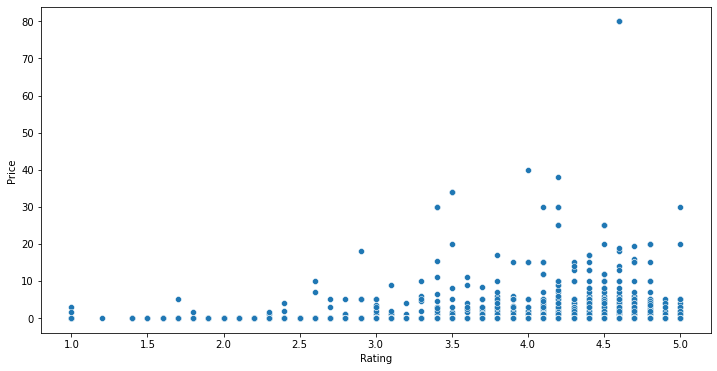

In [678]:
# 1. Make scatter plot/joinplot for Rating vs. Price
plt.figure(figsize=[12,6])
sns.scatterplot(x="Rating",y="Price",data=data)
plt.show()

 Does rating increase with price?
 Ans: Yes from above plot as the price is incresing rating of app is also increasing.

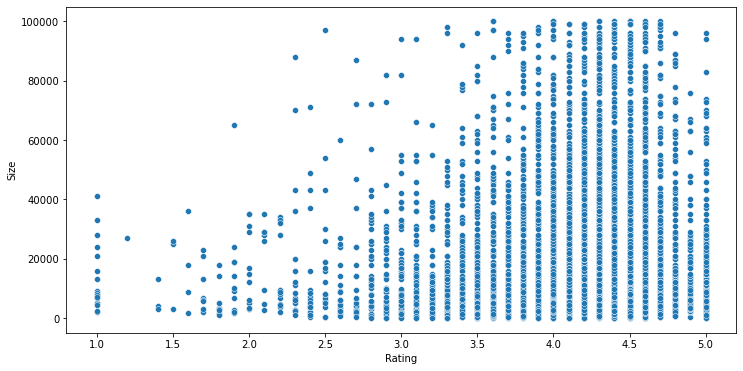

In [677]:
# 2. Make scatter plot/joinplot for Rating vs. Size

plt.figure(figsize=[12,6])
sns.scatterplot(x="Rating",y="Size",data=data)
plt.show()

Heavier apps rated better

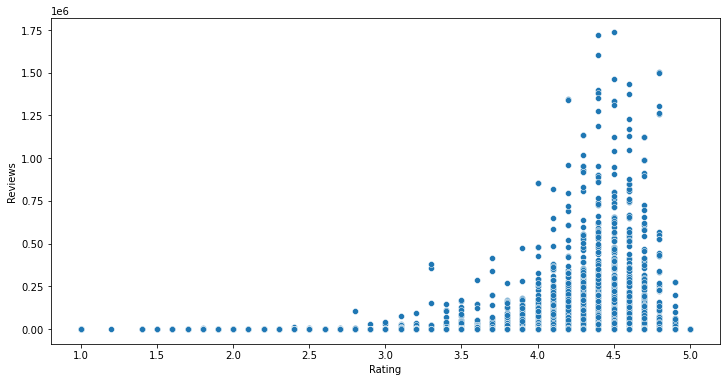

In [676]:
# 3. Make scatter plot/joinplot for Rating vs. Reviews

plt.figure(figsize=[12,6])
sns.scatterplot(x="Rating",y="Reviews",data=data)
plt.show()

From above scatter plot we can say more review mean a better rating

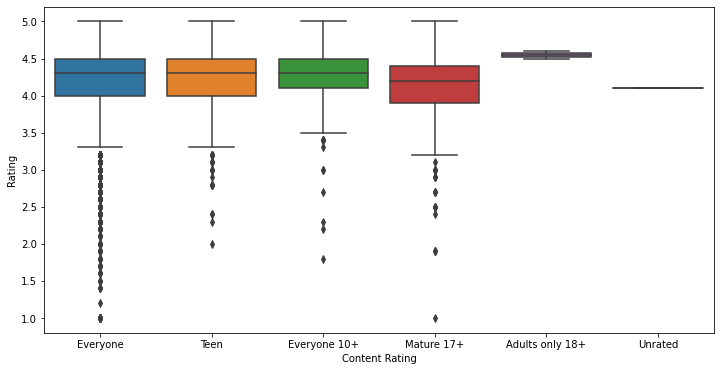

In [675]:
# 4. Make boxplot for Rating vs. Content Rating
plt.figure(figsize=[12,6])
sns.boxplot(x="Content Rating",y="Rating",data=data)
plt.show()

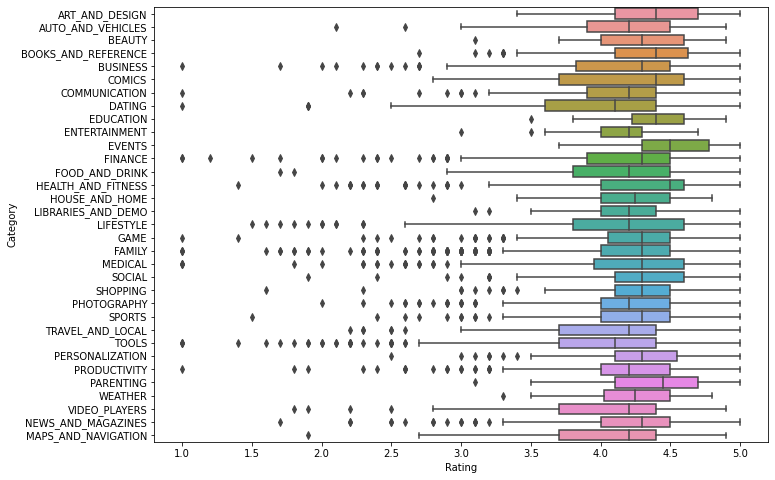

In [674]:
# 5.Make boxplot for Ratings vs. Category
plt.figure(figsize=[11,8])
sns.boxplot(x="Rating",y="Category",data=data)
plt.show()


From above box plot we can conclude that Parenting and Entertainment have best rating.

# Data preprocessing

In [342]:
inp1=data.copy()

In [343]:
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619.0,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [344]:
# 1.Reviews and Install have some values that are still relatively very high. np.log1p is used to
# reduce the skewness of graph
inp1['Reviews'] = np.log1p(inp1['Reviews'])

In [403]:
inp1['Installs'] = np.log1p(inp1['Installs'])

In [404]:
inp1['Size'] = np.log1p(inp1['Size'])

In [405]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,9.852247,2.323411,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,9.546884,2.647760,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,9.071193,2.798801,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,7.937732,2.526763,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,8.630700,2.469776,0.0,Everyone,Art & Design


In [408]:
# 2. Drop columns App, Last Updated, Current Ver, and Android Ver.
inp1.drop(columns = { 'App','Last Updated','Current Ver','Android Ver'},inplace=True)


KeyError: "['App' 'Android Ver' 'Current Ver' 'Last Updated'] not found in axis"

In [409]:
inp1.drop(columns = { 'Type'},inplace=True)


KeyError: "['Type'] not found in axis"

In [410]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,9.852247,2.323411,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,9.546884,2.647760,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,9.071193,2.798801,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,7.937732,2.526763,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,8.630700,2.469776,0.0,Everyone,Art & Design


In [606]:
# 3.Get dummy columns for Category, Genres, and Content Rating. 
list1=['Category', 'Genres','Content Rating']
list1

['Category', 'Genres', 'Content Rating']

In [607]:
inp2=inp1.copy()
inp2=pd.get_dummies(inp2,columns=list1)

In [608]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,9.852247,2.323411,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,9.546884,2.647760,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379520,9.071193,2.798801,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,7.937732,2.526763,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,8.630700,2.469776,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#  Train test split  and apply 70-30 split

In [695]:
# Split
from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(inp2,test_size=0.3,random_state=42)

In [696]:
df_train.shape

(5114, 156)

In [697]:
df_test.shape

(2193, 156)

# Separate the dataframes into X_train, y_train, X_test, and y_test.

In [698]:
y_train = df_train.pop("Rating")
X_train = df_train 

In [699]:
y_train

6285     4.5
7604     4.5
5254     4.8
6180     4.5
8696     4.4
        ... 
7855     3.8
7903     4.0
8122     3.9
1296     4.6
10784    4.3
Name: Rating, Length: 5114, dtype: float64

In [700]:
X_train

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
6285,11.062975,9.305741,2.695675,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7604,11.707949,11.050906,2.840136,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5254,3.891820,10.126671,2.253121,0.00,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6180,9.908575,8.962007,2.526763,9.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8696,6.453625,8.999743,2.526763,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7855,6.343880,10.645449,2.469776,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7903,5.852202,10.126671,2.323411,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,4.727388,7.244942,2.323411,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1296,11.658946,11.112463,2.840136,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [701]:
y_test = df_test.pop("Rating")
X_test = df_test

In [702]:
y_test

10459    4.7
6942     4.3
9637     4.4
2967     4.2
7904     4.5
        ... 
5999     3.9
9147     4.4
6295     4.5
5323     4.8
922      4.2
Name: Rating, Length: 2193, dtype: float64

#  Model building


In [703]:
# Use linear regression as the technique
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression


In [704]:
linear_reg=LinearRegression()

In [705]:
# Training
linear_reg.fit(X_train,y_train)

LinearRegression()

In [706]:
# testing / predict
y_pred=linear_reg.predict(X_test)

In [707]:
y_pred

array([4.3804289 , 4.24045452, 4.38305132, ..., 4.54441742, 4.71939863,
       4.04140727])

In [708]:
y_train

6285     4.5
7604     4.5
5254     4.8
6180     4.5
8696     4.4
        ... 
7855     3.8
7903     4.0
8122     3.9
1296     4.6
10784    4.3
Name: Rating, Length: 5114, dtype: float64

In [709]:
# Report the R2 on the train set
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
print(r_score)

0.12557396193191117


In [710]:
# Cross_validation
from sklearn.metrics import r2_score
print(r2_score(linear_reg.predict(X_train),y_train))


-4.218293779439712


In [711]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared error is",mse)

Mean Squared error is 0.25805522954375687


In [673]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared error is",rmse)

Root Mean Squared error is 3515466810.423019
